# EDA

---

We're going to be exploring our data!  So bear with me as I go down numerous rabbit holes...

## Import libraries and read in our data

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `/r/explainlikeimfive` Data Exploration:

In [68]:
eli5 = pd.read_csv('./data/eli5.csv')

In [69]:
eli5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       5000 non-null   object
 1   created_utc  5000 non-null   int64 
 2   selftext     3417 non-null   object
 3   subreddit    5000 non-null   object
 4   title        5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [70]:
eli5['author'].value_counts()

[deleted]           295
jade885              11
RicardoMilossGoa     10
__dp_Y2k              8
luneth77              7
                   ... 
Cheesepantsu          1
jordan_pancakes       1
biscuitsandrum        1
yeronyms              1
SincerelyAsh_         1
Name: author, Length: 3930, dtype: int64

In [71]:
eli5['title_word_count'] = eli5['title'].map(lambda x: len(x.split(' ')))

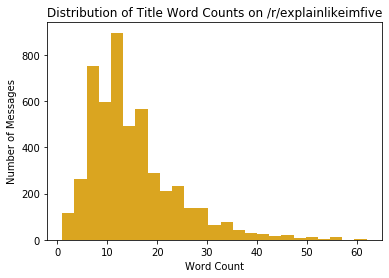

In [72]:
plt.hist(eli5['title_word_count'], bins = 25, color = 'goldenrod')
plt.title('Distribution of Title Word Counts on /r/explainlikeimfive')
plt.xlabel('Word Count')
plt.ylabel('Number of Messages');

### Unique Users

I want to see how many unique users there are in this subreddit.  This might tell me a few things:

- if there aren't a lot of unique posters, that means most posts are coming from a select few and this might increase my model's chances of guessing the right subreddit
- this could also lead to specific words that common posters would use and maybe my model could pick up on that

In [73]:
len(eli5['author'].unique())

3930

We can see below that there are a lot of 'deleted' accounts, which most likely are associated with 'throwaway' accounts.  This is a common phenomenon in which users will make a new Reddit account simply to ask an anonymous question because the information is too sensitive to post with their actual username due to either they don't want their friends and family finding out or to protect their own privacy from other Reddit users.

In [74]:
# Top 10 authors in eli5
eli5['author'].value_counts().head(10)

[deleted]           295
jade885              11
RicardoMilossGoa     10
__dp_Y2k              8
luneth77              7
walids                7
blorentz38            6
castleblack23         6
thomass518            6
MonkeyRides           6
Name: author, dtype: int64

In [75]:
eli5.loc[eli5['author'] == '[deleted]', :]

,author,created_utc,selftext,subreddit,title,title_word_count
2,[deleted],1595208362,NaN,explainlikeimfive,Why are horse shoes necessary when they seem t...,16
15,[deleted],1595206406,NaN,explainlikeimfive,ELI5: What makes colorful things that color?,7
16,[deleted],1595205893,NaN,explainlikeimfive,ELI5: why do we often cry when we see someone ...,12
19,[deleted],1595205234,NaN,explainlikeimfive,eli5: Why did countries bother locking down at...,29
24,[deleted],1595204673,NaN,explainlikeimfive,ELI5: why do I get dizzy from spinning for 10 ...,15
...,...,...,...,...,...,...
4656,[deleted],1594304118,NaN,explainlikeimfive,Eli5: I don’t understand how the Coos who kill...,32
4667,[deleted],1594302626,NaN,explainlikeimfive,ELI5: If dogs have such a strong sense of smal...,35
4978,[deleted],1594239722,NaN,explainlikeimfive,ELI5: Difference between 32-bit operating syst...,10
4989,[deleted],1594238357,[deleted],explainlikeimfive,ELI5: What is a limited company?,6


### Impute missing self text column

I will impute the 'selftext' column with 'none' because the "missing values" from the self text column is just a user who intentionally posted something that doesn't have any self text.  So, it would make sense that those cells are empty.

In [76]:
eli5['selftext'] = eli5['selftext'].fillna('None')

In [77]:
eli5.isnull().sum()

author              0
created_utc         0
selftext            0
subreddit           0
title               0
title_word_count    0
dtype: int64

In [78]:
eli5['selftext_word_count'] = eli5['selftext'].map(lambda x: len(x.split(' ')))

In [79]:
eli5.loc[eli5['selftext_word_count']!='None','selftext_word_count']

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0        1
1        1
2        1
3        1
4        1
        ..
4995    11
4996     1
4997     1
4998    16
4999     1
Name: selftext_word_count, Length: 5000, dtype: int64

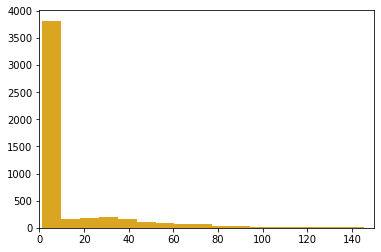

In [80]:
plt.hist(eli5.loc[eli5['selftext_word_count']!='None', 'selftext_word_count'], bins=50, color='goldenrod')
plt.xlim(0, 150);

## `/r/advice` Data Exploration:

In [81]:
advice = pd.read_csv('./data/advice.csv')
advice.head()

,author,created_utc,selftext,subreddit,title
0,OnRark,1595489993,"Im 21M. \n\nAs the title says, My grandad true...",Advice,My Grandad’s my best friend.
1,Dazzlinn,1595489985,My best friend (18M) has his birthday this wee...,Advice,Should I text my best friend who ghosted on me...
2,[deleted],1595489878,NaN,Advice,I (27M) booked an escort (48f) for tomorrow bu...
3,zaachy,1595489863,So my best friend for 3 years all of a sudden ...,Advice,I need some help on what to do.
4,DoodleJack1,1595489688,"I’m a 22 year old student from the UK, the fin...",Advice,Getting over it (a mental block)


In [82]:
advice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       5000 non-null   object
 1   created_utc  5000 non-null   int64 
 2   selftext     4715 non-null   object
 3   subreddit    5000 non-null   object
 4   title        5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


**Adding a word count column:**

I am curious to see what the distribution of the title word counts will be.  How many words do people usually use for the title?  Note:  this is only for the title.  I will be doing the same for the self text.

In [83]:
advice['title_word_count'] = advice['title'].map(lambda x: len(x.split(' ')))

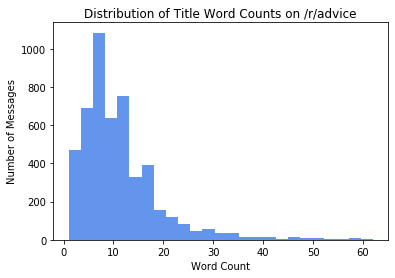

In [84]:
plt.hist(advice['title_word_count'], bins = 25, color = 'cornflowerblue')
plt.title('Distribution of Title Word Counts on /r/advice')
plt.xlabel('Word Count')
plt.ylabel('Number of Messages');

From the cell below, we can see that there are more 'deleted' users than `eli5` probably due to the fact that this is a legal advice subreddit and more people would want to stay anonymous.  Also, besides the 342 deleted users, there is more of a uniforma distribution among the users.

In [85]:
top_10_authors = advice['author'].value_counts().head(20)

In [86]:
df = pd.DataFrame(top_10_authors)

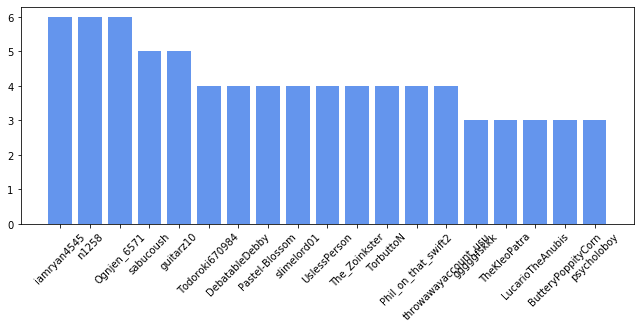

In [87]:
plt.figure(figsize = (11,4))
plt.bar(data = df, x = df.index[1:], height = df['author'][1:], color = 'cornflowerblue')
plt.xticks(rotation=45);

### Impute missing self text column

In [88]:
advice['selftext'] = advice['selftext'].fillna('None')

**Adding a word count column (for self text):**

In [89]:
advice['selftext_word_count'] = advice['selftext'].map(lambda x: len(x.split(' ')))

In [90]:
advice

,author,created_utc,selftext,subreddit,title,title_word_count,selftext_word_count
0,OnRark,1595489993,"Im 21M. \n\nAs the title says, My grandad true...",Advice,My Grandad’s my best friend.,5,102
1,Dazzlinn,1595489985,My best friend (18M) has his birthday this wee...,Advice,Should I text my best friend who ghosted on me...,13,139
2,[deleted],1595489878,None,Advice,I (27M) booked an escort (48f) for tomorrow bu...,19,1
3,zaachy,1595489863,So my best friend for 3 years all of a sudden ...,Advice,I need some help on what to do.,8,217
4,DoodleJack1,1595489688,"I’m a 22 year old student from the UK, the fin...",Advice,Getting over it (a mental block),6,258
...,...,...,...,...,...,...,...
4995,DustinJohnsonsTears,1595112336,Okay so my (24M) best friend (24F) has had an ...,Advice,How to help my friend with severe depression?,8,484
4996,sea316,1595112293,[removed],Advice,My parents support trump and my brother isnt s...,12,1
4997,gothiccthot666,1595112270,My family has a long history of depression but...,Advice,My mother is suicidal,4,218
4998,NeonStormFire,1595112093,"So, my partner(27M) and I(25F) will be getting...",Advice,How to bring up moving out to parents?,8,187


**The distribution of self text word count:**

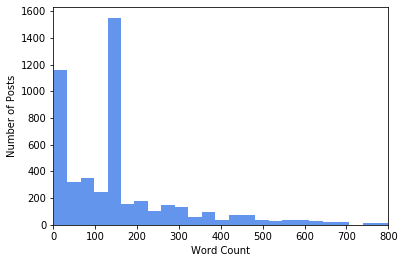

In [48]:
plt.hist(advice.loc[advice['selftext_word_count'],'selftext_word_count'], bins=50, color='cornflowerblue')
plt.xlabel('Word Count')
plt.ylabel('Number of Posts')
plt.xlim(0, 800);

Because the imputed 'None' was added to quite a few of these rows, what would the distribution if that was taken out entirely from our graph?

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


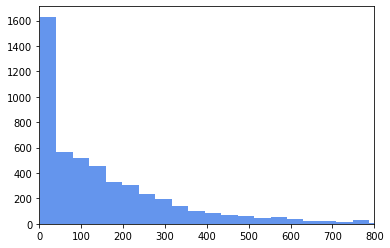

In [23]:
plt.hist(advice.loc[advice['selftext_word_count']!='None','selftext_word_count'], bins=70, color='cornflowerblue')
plt.xlim(0, 800);

## Concatenate the two dataframes

In [116]:
eli5.head()

,author,created_utc,selftext,subreddit,title,title_word_count,selftext_word_count
0,mwilliams7187,1595208496,[removed],explainlikeimfive,"ELI5: If our Sun is a Star, does that mean mos...",26,1
1,salzal,1595208420,[removed],explainlikeimfive,Eli5: If wearing a face mask doesn’t reduce ox...,21,1
2,[deleted],1595208362,None,explainlikeimfive,Why are horse shoes necessary when they seem t...,16,1
3,Bar_Delicious,1595208332,[removed],explainlikeimfive,Government,1,1
4,GarbageMiserable0x0,1595208225,[removed],explainlikeimfive,Do you want to get free games and prizes in yo...,14,1


In [49]:
advice.head()

,author,created_utc,selftext,subreddit,title,title_word_count,selftext_word_count
0,OnRark,1595489993,"Im 21M. \n\nAs the title says, My grandad true...",Advice,My Grandad’s my best friend.,5,102
1,Dazzlinn,1595489985,My best friend (18M) has his birthday this wee...,Advice,Should I text my best friend who ghosted on me...,13,139
2,[deleted],1595489878,None,Advice,I (27M) booked an escort (48f) for tomorrow bu...,19,1
3,zaachy,1595489863,So my best friend for 3 years all of a sudden ...,Advice,I need some help on what to do.,8,217
4,DoodleJack1,1595489688,"I’m a 22 year old student from the UK, the fin...",Advice,Getting over it (a mental block),6,258


In [64]:
both_subreddits = pd.concat([eli5, advice])

In [65]:
both_subreddits

,author,created_utc,selftext,subreddit,title,title_word_count,selftext_word_count
0,mwilliams7187,1595208496,[removed],explainlikeimfive,"ELI5: If our Sun is a Star, does that mean mos...",26,1
1,salzal,1595208420,[removed],explainlikeimfive,Eli5: If wearing a face mask doesn’t reduce ox...,21,1
2,[deleted],1595208362,None,explainlikeimfive,Why are horse shoes necessary when they seem t...,16,1
3,Bar_Delicious,1595208332,[removed],explainlikeimfive,Government,1,1
4,GarbageMiserable0x0,1595208225,[removed],explainlikeimfive,Do you want to get free games and prizes in yo...,14,1
...,...,...,...,...,...,...,...
4995,DustinJohnsonsTears,1595112336,Okay so my (24M) best friend (24F) has had an ...,Advice,How to help my friend with severe depression?,8,484
4996,sea316,1595112293,[removed],Advice,My parents support trump and my brother isnt s...,12,1
4997,gothiccthot666,1595112270,My family has a long history of depression but...,Advice,My mother is suicidal,4,218
4998,NeonStormFire,1595112093,"So, my partner(27M) and I(25F) will be getting...",Advice,How to bring up moving out to parents?,8,187


In [66]:
# both_subreddits.to_csv('./data/both_subreddits.csv', index = False)